# **Machine Learning LAB 3 - Prediction of Numeric Values**
<hr/>

Submitted by: <br>
> Name: **Drashty Ranpara** <br>
Register Number: **21122018** <br>
Class: **2MSCDS** <br> 
<hr/>

## **Summary -**
### The model done in this jupyter notebook achieved **99.99%** accuracy on **test data** using *GradientBoostingRegressor()*. The **user-entered prediction** reached the score of **99.97%** which is really good! 
### Scroll down to know more **:)**
---

## **Lab Overview**  
### **Objectives**
- **Common Instructions**
    - Use Pandas to Import the Dataset
    - Do the necessary Exploratory Data Analysis
    - Use the train_test_split method available in SCIKIT to split the dataset into Train Dataset and Test Dataset.
    - Show the Regression Score, Intercept and other parameters etc in the Output
    - Use visualizations and plots wherever possible
    - Format the outputs neatly; Do Documentation, Data Set Description, Objectives, Observations, Conclusions etc as you have done in your previous lab

- **Questions**
    1. What are your observations on the Dataset?
    2. What are the different Error Measures (Evaluation Metrics) in relation to Linear Regression? How much do you get in the above cases?
    3. Note down the errors/losses when the train-test ratio is 50:50, 60:40, 70:30, and 80:20
    4. During LinearRegression() process, what is the impact of giving TRUE/FALSE as the value for Normalize Parameter?
- **Cases** - Try to predict the rent of the below houses -
    1. 1 BHK with 2 Baths in Portofino Street
    2. Fully Furnished 2 BHK in School Street
    3. Single Room anywhere in Lavasa









## **Problem Definition -**
Using linear regression model predict the monthly rent for required use cases.

## **Sections**
Here, you mention the sections you have defined in the below code. For this lab, the sections are -
1. Installing and using necessary libraries
2. Data Preprocessing
3. Data Cleaning
4. EDA of dataset
 - Target Variable Analysis
 - Correlation Study
 - Bivariate Analysis
 - Multivariate Analysis
5. Encoding
6. Training and Testing on data
7. Fitting the model
 - Using Linear Regression
 - Compare various different Regressor for training
    - GradientBoostingRegressor
    - lasso
    - ENet
    - GBoost
    - XGBRegressor
    - LGBMRegressor
8. Some Vizualisations
9. Evaluation Metrics
 - MAPE | MAE | MSE | RMSE | R2 | RMSLE | Adjusted R2
10. Defining use cases and making predictions

## **Data Preprocessing -**

In [246]:
# Libraries for handling numeric computation and dataframes
import pandas as pd
import numpy as np
# Libraries for statistical plotting
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

#statistics
from scipy import stats
from scipy.stats import norm, skew
import scipy.stats as stats
import pylab

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from pprint import pprint as pp # pretty printing of dictionaries

#Regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
import xgboost as xgb
import lightgbm as lgb
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew

import warnings
warnings.filterwarnings("ignore") # to supress warnings

In [247]:
df=pd.read_csv('/content/sample_data/data.csv')
df.head()

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth
0,Minimum Budget Rooms,Portofino H,1 BHK,400.0,1,1,1,1100.0
1,Minimum Budget Rooms,Portofino H,1 BHK,450.0,1,1,1,1100.0
2,Minimum Budget Rooms,School Street,1 BHK,530.0,1,1,0,1166.0
3,Minimum Budget Rooms,Portofino B,1 BHK,400.0,1,1,0,1400.0
4,Minimum Budget Rooms,School Street,2 BHK,460.0,1,1,0,1500.0


In [248]:
#Dataset information - cols and their dtypes, memory useage, non-null counts...
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BuildingType  1000 non-null   object 
 1   Location      1000 non-null   object 
 2   Size          1000 non-null   object 
 3   AreaSqFt      1000 non-null   float64
 4   NoOfBath      1000 non-null   int64  
 5   NoOfPeople    1000 non-null   int64  
 6   NoOfBalcony   1000 non-null   int64  
 7   RentPerMonth  1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


## **Data Cleaning -**

In [249]:
# Checking categories in Location column
print(df.Location.value_counts())
# Categories reclassification and replacement
df['Location'] = ['Portofino' if 'Portofino' in i else i for i in df['Location']]
# Checking new categories in product_type column
print('\n--------------------------\n',df.Location.value_counts())

Clubview Road    213
Portofino B      173
School Street    138
Portofino D      105
Portofino C      103
Portofino A       95
Portofino H       62
Portofino E       54
Portofino G       26
Portofino F       22
Starter Homes      9
Name: Location, dtype: int64

--------------------------
 Portofino        640
Clubview Road    213
School Street    138
Starter Homes      9
Name: Location, dtype: int64


In [250]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AreaSqFt,1000.0,1548.27001,1345.141175,375.0,1090.0,1270.0,1664.25,35000.0
NoOfBath,1000.0,2.66100,1.247251,1.0,2.0,2.0,3.00,11.0
NoOfPeople,1000.0,2.16800,0.959529,1.0,2.0,2.0,2.00,6.0
NoOfBalcony,1000.0,1.54400,0.838312,0.0,1.0,2.0,2.00,3.0
RentPerMonth,1000.0,10476.63350,10509.508971,1100.0,4890.5,7000.0,11925.00,96000.0


In [251]:
df.isna().sum() # no missing values found

BuildingType    0
Location        0
Size            0
AreaSqFt        0
NoOfBath        0
NoOfPeople      0
NoOfBalcony     0
RentPerMonth    0
dtype: int64

Now we change the data types of certain columns from **“object” to “str”.**

In [252]:
for i in ['BuildingType', 'Location', 'Size']:
  df[i] = df[i].apply(str)
df.dtypes # data type of each column

BuildingType     object
Location         object
Size             object
AreaSqFt        float64
NoOfBath          int64
NoOfPeople        int64
NoOfBalcony       int64
RentPerMonth    float64
dtype: object

## **Target Variable Analysis -**

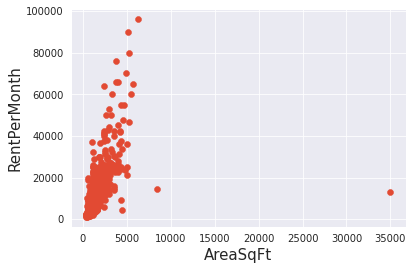

In [253]:
fig, ax = plt.subplots()
ax.scatter(x = df['AreaSqFt'], y = df['RentPerMonth'])
plt.ylabel('RentPerMonth', fontsize=15)
plt.xlabel('AreaSqFt', fontsize=15)
plt.show()

**Inference :** From the above plot, the AreaSqFt and RentPerMonth have roughly a linear relationship.
Also, note that the two dots on the left/right-bottom where the AreaSqFt is more and the RentPerMonth is very less. It could be land with less population and far from market. These two points don’t obey the general pattern that is clearly visible. These are called Outliers. Feeding these two data points to our model might impede the model performance. And hence we should delete these outliers before modeling.

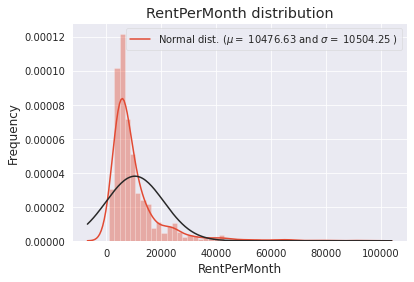

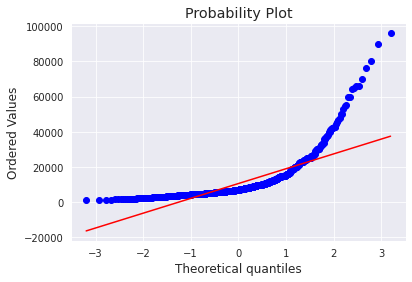

In [254]:
sns.distplot(df['RentPerMonth'] , fit=norm);
(mu, sigma) = norm.fit(df['RentPerMonth'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], # $\ is used for symbols, $ for fetching value
            loc='best')
plt.ylabel('Frequency')
plt.title('RentPerMonth distribution')
fig = plt.figure()
res = stats.probplot(df['RentPerMonth'], plot=plt)
plt.show()

**Inference -** As we can see in the graph, the data is not normally distributed. The linear models expect the data to be normally distributed. Hence we need to transform the variable to look like a normal distribution — *a bell* curve.

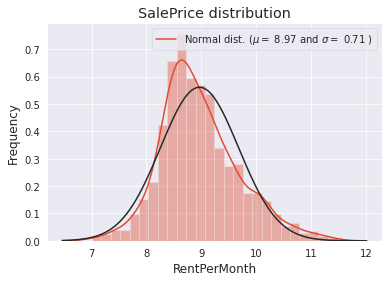

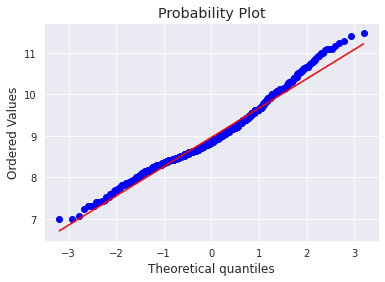

In [255]:
df['RentPerMonth'] = np.log1p(df['RentPerMonth'])
 
sns.distplot(df['RentPerMonth'] , fit=norm);
(mu, sigma) = norm.fit(df['RentPerMonth'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
fig = plt.figure()
res = stats.probplot(df['RentPerMonth'], plot=plt)
plt.show()

In [256]:
np.expm1(df['RentPerMonth'])

0       1100.0
1       1100.0
2       1166.0
3       1400.0
4       1500.0
        ...   
995    70000.0
996    76000.0
997    80000.0
998    90000.0
999    96000.0
Name: RentPerMonth, Length: 1000, dtype: float64

**Inference -** We did a log transformation to the *'RentPerMonth'* variable which reduces the skew in the variable and results in a more or less normally distributed variable.

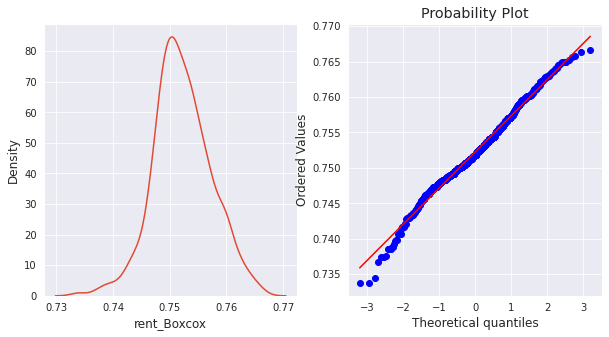

In [257]:
#function to return plots for the feature
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

df['rent_Boxcox'],parameters=stats.boxcox(df['RentPerMonth'])
normality(df,'rent_Boxcox')

In [258]:
df['RentPerMonth']

0       7.003974
1       7.003974
2       7.062192
3       7.244942
4       7.313887
         ...    
995    11.156265
996    11.238502
997    11.289794
998    11.407576
999    11.472114
Name: RentPerMonth, Length: 1000, dtype: float64

**Inference -** 
- ***Box cox transformation*** technique also gives a good result and normally distributes the *Rent* feature. The data points on the Q-Q plot are almost on the line as well.

- From 2 transformations discussed above, we can conclude that the Box cox performs the best on the *Rent* variable and transform it to normal distribution. Any one of the two can be used but as Box cox is more logic-based and involves the **λ variable which is chosen as per the best skewness** for the data so Box cox will be a better transformation to go with.

## **Correlation Study -**
We have a few columns in our data set. Visualizing all the data takes a lot of time. We will consider the variables which are highly correlated (both positive and negative) with our target variable "RentPerMonth".

In [259]:
df.corr()['RentPerMonth'] # Correlation of all column w.r.t RentPerMonth(Target Variable)

AreaSqFt        0.471576
NoOfBath        0.667844
NoOfPeople      0.777334
NoOfBalcony     0.248039
RentPerMonth    1.000000
rent_Boxcox     0.991346
Name: RentPerMonth, dtype: float64

We just got all the variables that are **highly correlated with our target variable**

In [260]:
corrdata = df.corr()
def get_correlated_features(corrdata, threshold):
    feature = []
    value = []
    for i , index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
    df2 = pd.DataFrame(data = value, index=feature, columns=['corr value'] )
    return df2
corr_df = get_correlated_features(corrdata['RentPerMonth'], 0.5)
corr_df

,corr value
NoOfBath,0.667844
NoOfPeople,0.777334
RentPerMonth,1.000000
rent_Boxcox,0.991346


Look at the **heatmap of the correlated data** to trigger our visual thinking

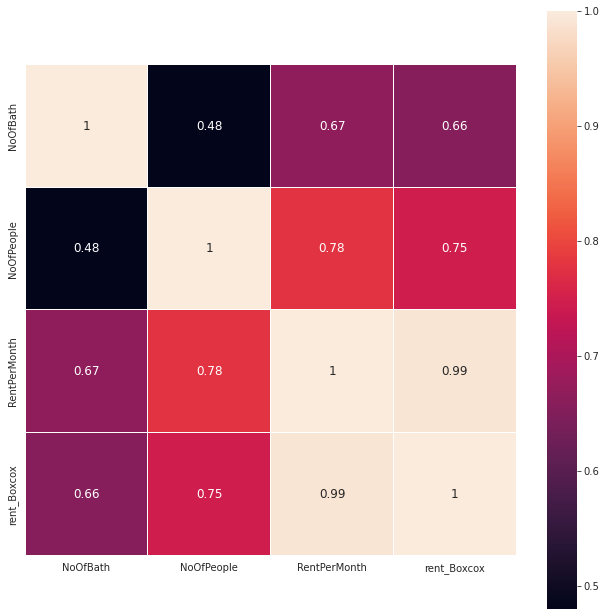

In [261]:
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(df[corr_df.index].corr(), annot = True, annot_kws={'size': 12}, square=True, linecolor='w', linewidths=0.1)

**Inference -** So, we can conclude that NoOfPeople and NoOfBath shows positive relation w.r.t. RentPerMonth.

## **Bivariate Analysis -**
Since NoOfPeople=0.77 is highly correlated with the target variable, let's focus on it first.

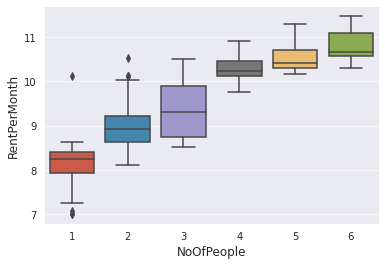

In [262]:
sns.boxplot(y='RentPerMonth', x = 'NoOfPeople', data=df)

**Inference -**
We can see a trend in data. The above plot clearly shows a linear relationship between 'RentPerMonth' and 'NoOfPeople'. The 'RentPerMonth' increases with an increase in 'NoOfPeople'.

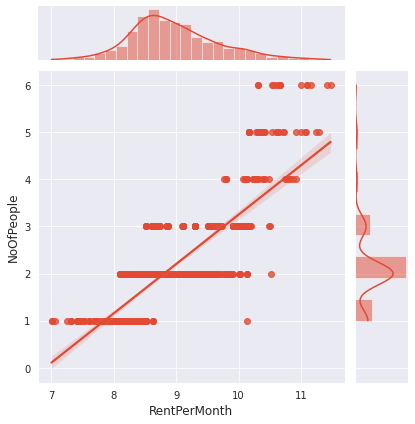

In [263]:
sns.jointplot(x='RentPerMonth', y='NoOfPeople', data=df, kind='reg')

Now, let's analyze the next variable ‘NoOfBath’=0.66 since it is highly correlated with our target variable.

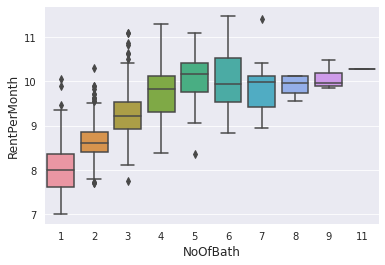

In [264]:
sns.boxplot(y='RentPerMonth', x = 'NoOfBath', data=df)

**Inference -**
Obviously, there is a linear relationship between NoOfBath and RentPerMonth.

Now, let's analyze the next variable ‘NoOfBalcony’=0.284 since it is least correlated with our target variable.

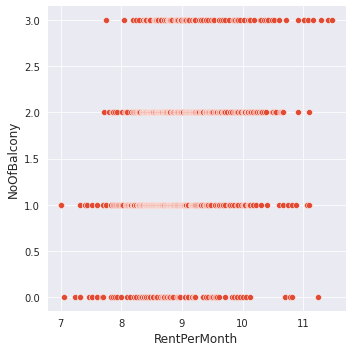

In [265]:
sns.relplot(x='RentPerMonth', y = 'NoOfBalcony', data=df)

**Inference -**
As you can see in the above plot NoOfBalcony is also highly negatively correlated with the target variable and hence we couldn't see any trend in the data. But this *helps the model to predict better.*

## **Multivariate Analysis -**

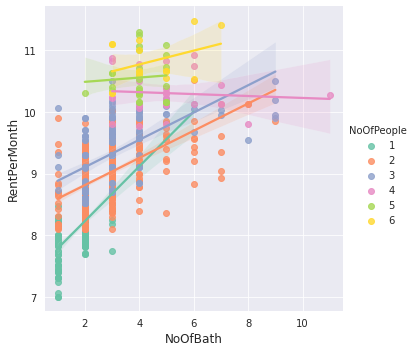

In [266]:
sns.lmplot(x='NoOfBath', y='RentPerMonth', data=df, hue= 'NoOfPeople',palette='Set2')

**Inference -**
The plot above presents linear regression models fit on the data grouped based on different values of ‘NoOfPeople’ represented by different colors. 

Graph a bit obscure. Let’s separate the groups into a grid of plots.

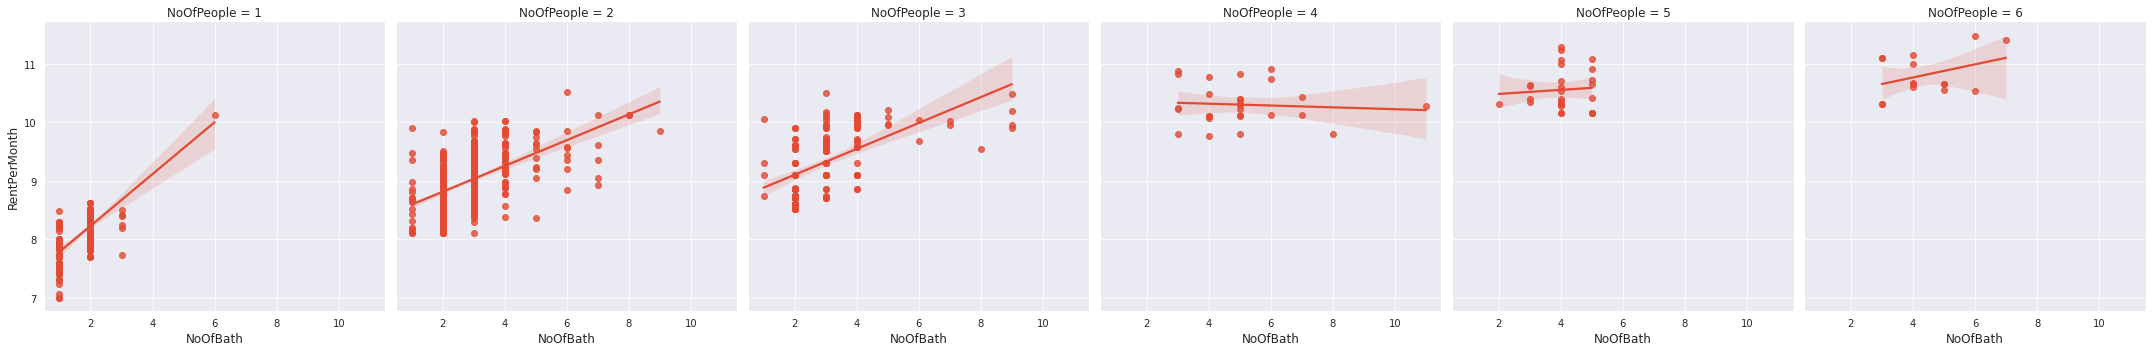

In [267]:
sns.lmplot(x='NoOfBath', y='RentPerMonth', data=df, col= 'NoOfPeople')

**Inference -**
Notice the cluster of points moving towards the right of the plot as we move along the grid. There is a clear increase in the overall quality of the house with an increase in Number of People capacity. NoOfPeople=6 is an exception to this insight. Also, notice the increase in uncertainty in the last plot. This is due to a lack of data points to produce a confident fit for a linear regression model.

## **Label Encoding to Categorical values of each column -**

In [268]:
le = dict()
for i in ['BuildingType', 'Location', 'Size']:
  le = LabelEncoder()
  df[i] = np.array(le.fit_transform(df[i])).reshape(-1,1)
df

,BuildingType,Location,Size,AreaSqFt,NoOfBath,NoOfPeople,NoOfBalcony,RentPerMonth,rent_Boxcox
0,3,1,0,400.0,1,1,1,7.003974,0.733694
1,3,1,0,450.0,1,1,1,7.003974,0.733694
2,3,2,0,530.0,1,1,0,7.062192,0.734429
3,3,1,0,400.0,1,1,0,7.244942,0.736650
4,3,2,2,460.0,1,1,0,7.313887,0.737456
...,...,...,...,...,...,...,...,...,...
995,9,1,4,4900.0,4,6,3,11.156265,0.765255
996,9,1,4,3750.0,4,5,0,11.238502,0.765621
997,9,2,4,5270.0,4,5,3,11.289794,0.765847
998,9,1,6,5100.0,7,6,3,11.407576,0.766356


In [269]:
labelled = dict()
for i in ['BuildingType', 'Location', 'Size']:
  labelled.update({i:df[i].unique()})
labelled

{'BuildingType': array([3, 5, 4, 1, 8, 6, 0, 7, 2, 9]),
 'Location': array([1, 2, 0, 3]),
 'Size': array([0, 2, 1, 3, 4, 5, 6, 8, 7, 9])}

In [270]:
le.classes_

array(['1 BHK', '1 RK', '2 BHK', '3 BHK', '4 BHK', '5 BHK', '6 BHK',
       '7 BHK', '8 BHK', '9 BHK'], dtype=object)

## **Use the *train_test_split* method available in SCIKIT to split the dataset into Train Dataset and Test Dataset.**

In [271]:
mms = MinMaxScaler()
mms_transform = mms.fit_transform(df)

In [272]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=3)

# StandardScaler for Standardization
'''StandardScaler is a class from sklearn.preprocessing which is used for standardization.'''
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
print(f'Standardization on Training Set -\n {X_train_std[:3]}\n\nStandardization on Testing Set -\n {X_test_std[:3]}')

Standardization on Training Set -
 [[-1.95372515 -1.49693884  2.53586354  0.76249715  1.88064637  1.82265729
  -0.63051049  1.59856318]
 [ 0.59587889  0.10774292  0.20938323 -0.14646001  0.25840058  0.8068451
   0.54331223 -0.39182689]
 [ 0.59587889  0.10774292 -0.56611021 -0.32466345 -0.55272232 -0.20896708
  -0.63051049 -0.73237277]]

Standardization on Testing Set -
 [[ 0.08595808  0.10774292  0.20938323  0.58309771  0.25840058 -0.20896708
   0.54331223  0.18905622]
 [ 2.12564131 -1.49693884  2.53586354 -0.98365739  0.25840058 -0.20896708
   0.54331223  0.57487064]
 [ 1.1057997  -1.49693884  0.98487666 -0.38565926  1.06952348  0.8068451
  -0.63051049  1.48226591]]


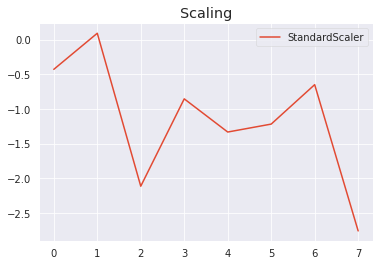

In [273]:
plt.plot(StandardScaler().fit_transform(df[['BuildingType','Location','Size','AreaSqFt','NoOfBath','NoOfPeople','NoOfBalcony','RentPerMonth']])[0], label='StandardScaler')
plt.title('Scaling')
plt.legend()

## **Show the Regression Score, Intercept and other parameters etc in the Output**

In [274]:
df=df.drop(columns= ['rent_Boxcox'])
df.columns

Index(['BuildingType', 'Location', 'Size', 'AreaSqFt', 'NoOfBath',
       'NoOfPeople', 'NoOfBalcony', 'RentPerMonth'],
      dtype='object')

In [275]:
#normalize : True -> If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f'Score: {lr.score(X_train, y_train)}\nIntercept: {lr.intercept_}\n-------------------------------------')
coeff_df = pd.DataFrame(lr.coef_, df.columns, columns=['Coefficient'])
coeff_df

Score: 0.986692792720916
Intercept: 0.684704250832024
-------------------------------------


,Coefficient
BuildingType,-4.783718e-05
Location,-2.849196e-05
Size,2.421442e-04
AreaSqFt,-2.769709e-07
NoOfBath,-2.598425e-04
NoOfPeople,-2.661507e-04
NoOfBalcony,9.079964e-05
RentPerMonth,7.654149e-03


In [276]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


,Actual,Predicted
642,0.753759,0.753300
762,0.755648,0.756344
909,0.759633,0.760179
199,0.748320,0.748387
586,0.753015,0.752840
...,...,...
466,0.751399,0.750896
654,0.754061,0.754346
279,0.749226,0.748927
945,0.760628,0.761331


In [277]:
seed=4
lasso = Lasso(random_state=seed)
ENet = ElasticNet(random_state=seed)
GBoost = GradientBoostingRegressor(random_state =seed)
model_xgb = xgb.XGBRegressor(random_state =seed)
model_lgb = lgb.LGBMRegressor(random_state =seed)

[16:41:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


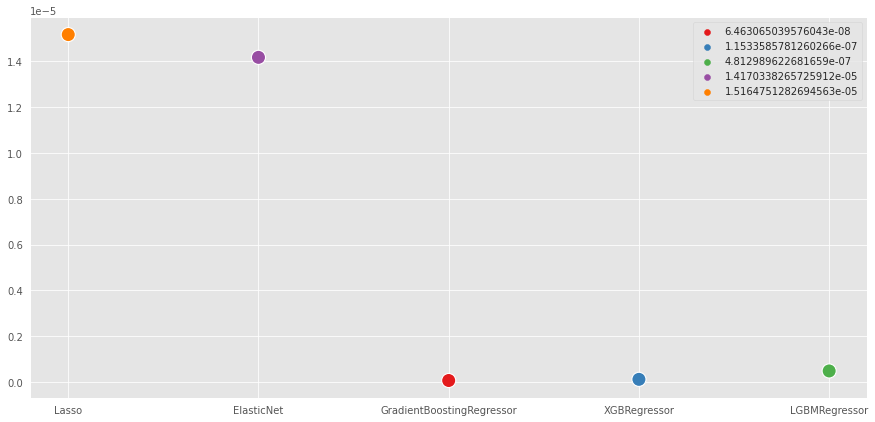

In [278]:
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
model_names = ['Lasso', 'ElasticNet', 'GradientBoostingRegressor', 'XGBRegressor', 'LGBMRegressor']
models =  [lasso, ENet, GBoost, model_xgb, model_lgb]
mean_score = []
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    mean_score.append(-1 * scores.mean())
plt.figure(figsize=(15, 7))
g = sns.scatterplot(x=model_names, y=mean_score, hue=mean_score, s=200,palette='Set1')
plt.show();

**Inference -**
From the above graph Gradient Boosting Regressor performs better than other models. Hence we choose this model for prediction.

## **GradientBoostingRegressor -**

In [279]:
# improving the accuracy using Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators= 500, min_samples_leaf=1)
gbr.fit(X_train, y_train)
y_gbrpred = gbr.predict(X_test)
gbr.score(X_train, y_train)

0.9999959913113378

**Inference -**
n_estimators : int, default=100

The number of boosting stages to perform. Gradient boosting
is fairly robust to over-fitting so a large number usually
results in better performance.

In [280]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_gbrpred})

,Actual,Predicted
642,0.753759,0.753766
762,0.755648,0.755639
909,0.759633,0.759637
199,0.748320,0.748319
586,0.753015,0.752987
...,...,...
466,0.751399,0.751413
654,0.754061,0.754068
279,0.749226,0.749198
945,0.760628,0.760634


The **MAPE (Mean Absolute Percentage Error)**. MAPE is an alternative performance metric for regression problems that presents the results in percentages which is more interpretable than Mean Squared Error (MSE).

In [281]:
MAPE = abs((y_test - y_gbrpred) / y_test).mean()
MAPE

3.878222966209193e-05

## **Accuracy Score** by inverting MAPE.

In [282]:
100. - (100. * MAPE)

99.99612177703379

## **Use visualizations and plots wherever possible -**

**1. pairplot()**

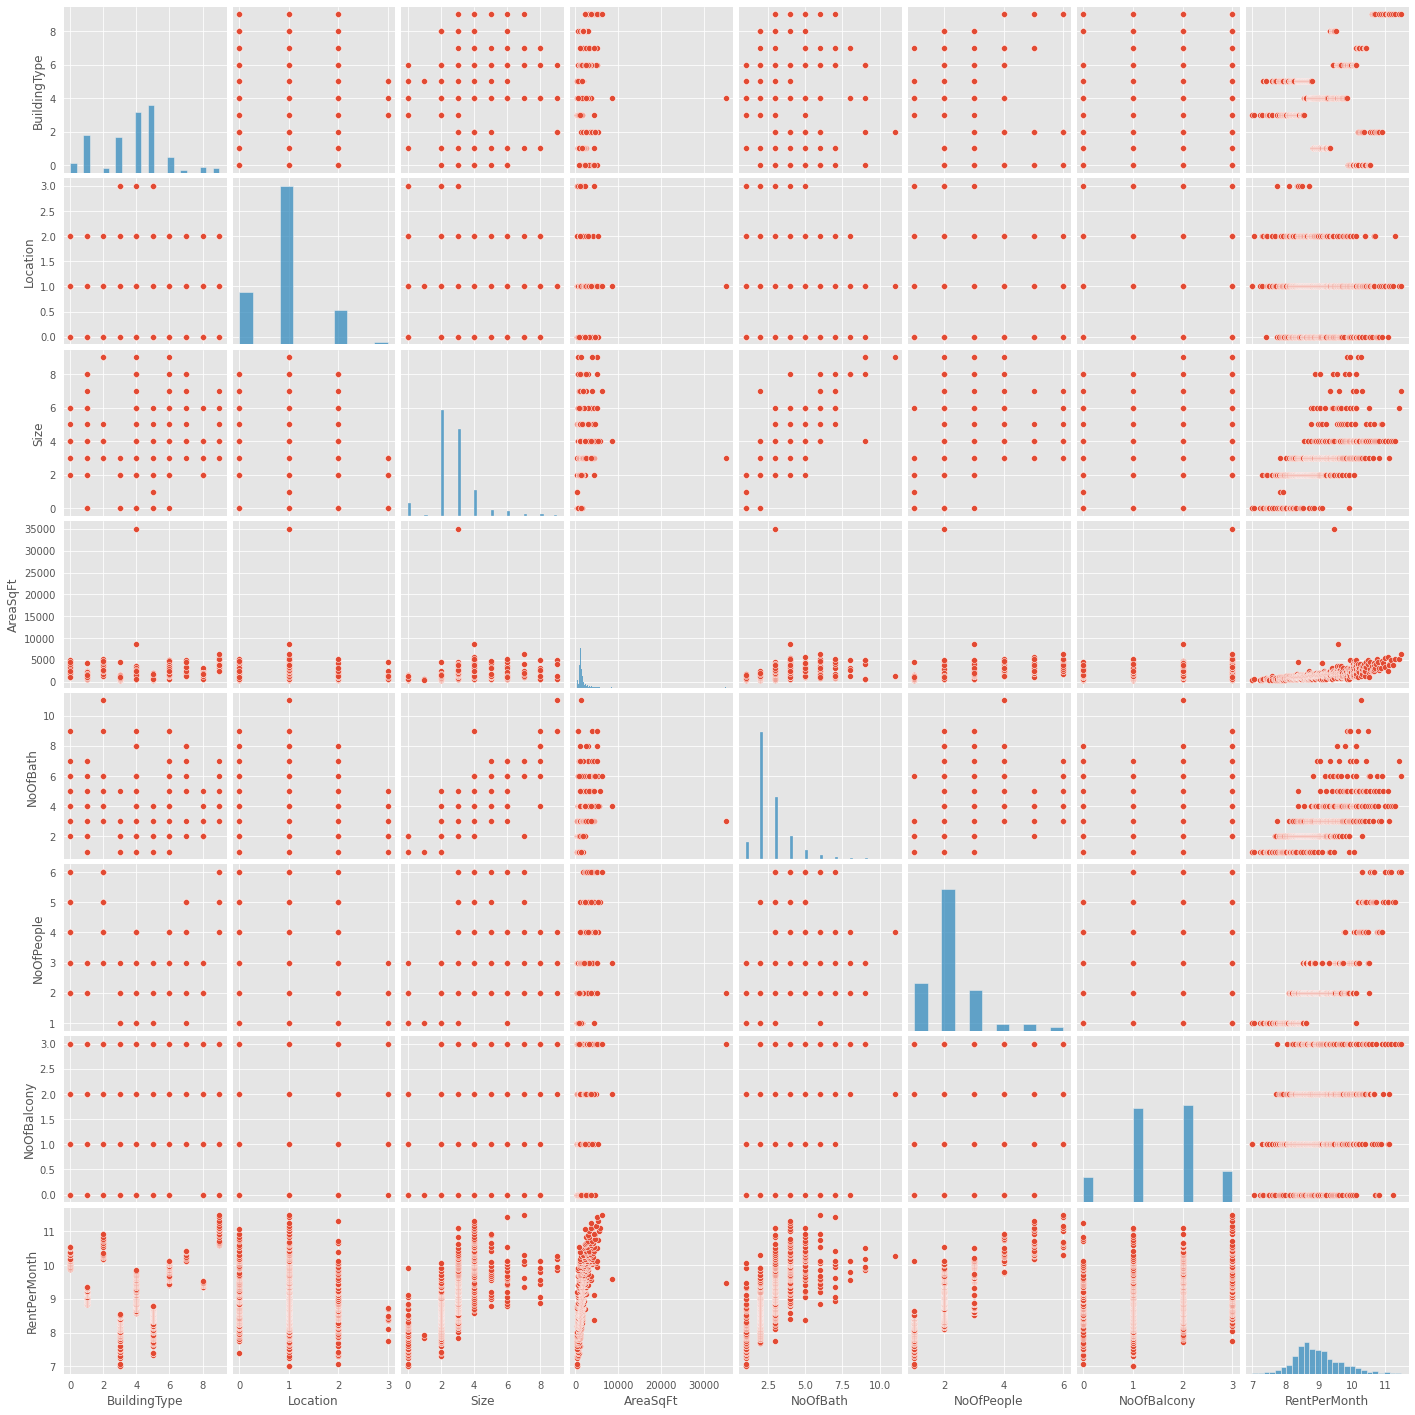

In [283]:
sns.pairplot(df)

**2. Violinplot()**

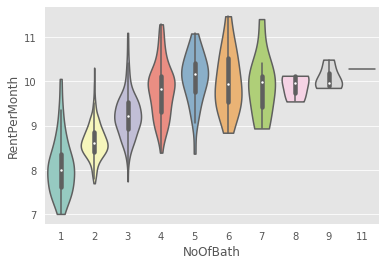

In [285]:
sns.violinplot(y='RentPerMonth', x = 'NoOfBath', data=df, cut=0, scale="width", palette="Set3")

---
# **Questions**
---

## **1. What are your observations on the Dataset?**

- The correlation gives us the important features to be taken into cosideration. NoOfPeople is one of the most important feature in finding RentPerMonth. 
- Next, Target variable analysis is must to distribute data normally before model development.
- Outliers should be handled smartly and data preprocessing is followed by data cleaning.
- Mapping is needed for all Portofino streets

## **2. What are the different Error Measures (Evaluation Metrics) in relation to Linear Regression? How much do you get in the above cases?**
> **1) Mean Absolute Error(MAE)**

> ![picture](https://editor.analyticsvidhya.com/uploads/71890MAE%20Formula.png)

>**Advantages of MAE**
- The MAE you get is in the same unit as the output variable.
- It is most Robust to outliers.

>**Disadvantages of MAE**
- The graph of MAE is not differentiable so we have to apply various optimizers like Gradient descent which can be differentiable.

In [286]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, r2_score

In [287]:
MAE=mean_absolute_error(y_test,y_pred)3

print("MAE",MAE)

MAE 0.00041424058448146634


> **2) Mean Squared Error(MSE)**

> ![picture](https://lh3.googleusercontent.com/-JBio3Q_1FiI/YB2oQKEmRBI/AAAAAAAAAkM/c8KJ3wPwtMEd3Ik0nYMMdmr_pRqMF6MlQCLcBGAsYHQ/w550-h177/image.png)

>**Advantages of MSE**
- The graph of MSE is differentiable, so you can easily use it as a loss function.

>**Disadvantages of MSE**
- The value you get after calculating MSE is a squared unit of output. for example, the output variable is in meter(m) then after calculating MSE the output we get is in meter squared.
- If you have outliers in the dataset then it penalizes the outliers most and the calculated MSE is bigger. So, in short, It is not Robust to outliers which were an advantage in MAE.

In [288]:
MSE=mean_squared_error(y_test,y_pred)
print("MSE",MSE)

MSE 6.123409803704665e-07


> **3) Root Mean Squared Error(RMSE)**

> ![picture](https://editor.analyticsvidhya.com/uploads/34962RMSLE%20Formula.png)

> **Advantages of RMSE**
> - The output value you get is in the same unit as the required output variable which makes interpretation of loss easy.

>**Disadvantages of RMSE**
> - It is not that robust to outliers as compared to MAE.
for performing RMSE we have to NumPy NumPy square root function over MSE.

In [289]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE",RMSE)

RMSE 0.0007825221916153346


> **4) R Squared (R2)**

> ![picture](https://editor.analyticsvidhya.com/uploads/22091R2%20Squared%20Formula.png)

>- If the R2 score is zero then the above regression line by mean line is equal means 1 so 1-1 is zero. So, in this case, both lines are overlapping means model performance is worst, It is not capable to take advantage of the output column.

>- Now the second case is when the R2 score is 1, it means when the division term is zero and it will happen when the regression line does not make any mistake, it is perfect. In the real world, it is not possible.

>- So we can conclude that as our regression line moves towards perfection, R2 score move towards one. And the model performance improves.

In [290]:
r2 = r2_score(y_test,y_pred)
print('R2 Score ',r2)

R2 Score  0.9754750545851169


> **5) Root Mean Squared Log Error(RMSLE)**

>- Taking the log of the RMSE metric slows down the scale of error. The metric is very helpful when you are developing a model without calling the inputs. In that case, the output will vary on a large scale.

In [291]:
RMSLE=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
print("RMSLE",RMSLE)

RMSLE -7.152988276060299


> **6) Adjusted R Squared**

> ![picture](https://lh3.googleusercontent.com/-6T1LxrK1by8/YB6D5hjSCjI/AAAAAAAAAlk/gCmLpEJMJ3MpwO6r-sI7GQzuOQP2I1B3QCLcBGAsYHQ/w332-h179/image.png)

>- The disadvantage of the R2 score is while adding new features in data the R2 score starts increasing or remains constant but it never decreases because It assumes that while adding more data variance of data increases.

>- But the problem is when we add an irrelevant feature in the dataset then at that time R2 sometimes starts increasing which is incorrect.

>- Hence, To control this situation Adjusted R Squared came into existence.



In [292]:
n=40
k=2
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print('Adjusted R Squared Score ',adj_r2_score)

Adjusted R Squared Score  0.974149381859988


> ## **Evaluation Metrics Table -**

In [350]:
# initialize data of lists.
data = {'Independent Variable':['RentPerMonth'],
 'Mean Absolute Error (MAE)':[MAE],
 'MAPE (Mean Absolute Percentage Error)':[MAPE],
 'Mean Squared Error(MSE)':[MSE],
 'Root Mean Squared Error (RMSE)':[RMSE],
 'Root Mean Squared Log Error(RMSLE)':[RMSLE],
 'R Squared (R2)':[r2],
 'Adjusted R Squared (R2)':[adj_r2_score],
 } 
# Create DataFrame
df = pd.DataFrame(data)
# Print the output.
df.T


,0
Independent Variable,RentPerMonth
Mean Absolute Error (MAE),0.000414
MAPE (Mean Absolute Percentage Error),0.000039
Mean Squared Error(MSE),0.000001
Root Mean Squared Error (RMSE),0.000783
Root Mean Squared Log Error(RMSLE),-7.152988
R Squared (R2),0.975475
Adjusted R Squared (R2),0.974149


## **3. Note down the errors/losses when the train-test ratio is 50:50, 60:40, 70:30, and 80:20**

In [293]:
empty = list()
for i in [.5, .4, .3, .2]: 
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1],test_size=i, random_state=3)
    gbr = GradientBoostingRegressor(n_estimators= 500, min_samples_leaf=1)
    gbr.fit(X_train, y_train)
    y_gbrpred = gbr.predict(X_test)
    empty.append([1-i, i, 3, r2_score(y_test, y_gbrpred)])
finaldata=pd.DataFrame(empty, columns=['TrainRatio','TestRatio','RandomState','Error'])
finaldata

,TrainRatio,TestRatio,RandomState,Error
0,0.5,0.5,3,0.876083
1,0.6,0.4,3,0.901028
2,0.7,0.3,3,0.905676
3,0.8,0.2,3,0.915940


## **4. During LinearRegression() process, what is the impact of giving TRUE/FALSE as the value for Normalize Parameter?**

In [294]:
lr = LinearRegression(normalize=True, n_jobs=-1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f'Score with Normalize True : {lr.score(X_train, y_train)}')

Score with Normalize True : 0.7683643761362786


In [295]:
lr = LinearRegression(normalize=False)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f'Score with Normalize False : {lr.score(X_train, y_train)}')

Score with Normalize False : 0.7683643761362786


**Inference -**
This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

---
# **Cases - using pipeline and linear regression**
---

## Try to predict the rent of the below houses -
1. 1 BHK with 2 Baths in Portofino Street
2. Fully Furnished 2 BHK in School Street
3. Single Room anywhere in Lavasa

Looking at the below data and its encoding you can predict any use case by giving input to  predict the **RentPerMonth** for the user-entered details.

{'BuildingType': {'Fully Furnished Flat': 0,
  'Fully Furnished Single Room': 1,
  'Fully Furnished Villa': 2,
  'Minimum Budget Rooms': 3,
  'Semi Furnished Flat': 4,
  'Semi Furnished Single Room': 5,
  'Semi Furnished Villa': 6,
  'Super Furnished Flat': 7,
  'Super Furnished Single Room': 8,
  'Super Furnished Villa': 9},
 'Location': {'Clubview Road': 0,
  'Portofino': 1,
  'School Street': 2,
  'Starter Homes': 3},
 'Size': {'1 BHK': 0,
  '1 RK': 1,
  '2 BHK': 2,
  '3 BHK': 3,
  '4 BHK': 4,
  '5 BHK': 5,
  '6 BHK': 6,
  '7 BHK': 7,
  '8 BHK': 8,
  '9 BHK': 9}}

## We used **np.expm1()** is used the **inverse the np.log1p()** which we did in Target Variable Analysis for better prediction of explanatory variable

In [348]:
# improving the accuracy using Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=3000, min_samples_leaf=1,learning_rate=1.270)
model =gbr.fit(X_train, y_train)
y_gbrpred = model.predict([[int(input('BuildingType [0-9] : ')),int(input('Location [0-3] : ')),int(input('Size [0-9] : ')),int(input('AreaSqFt : ')),int(input('NoOfBath : ')),int(input('NoOfPeople : ')),int(input('NoOfBalcony : '))]])
print('Accuracy Score for Prediction : ',gbr.score(X_train, y_train))
finaldf=pd.DataFrame({'Predicted': np.expm1(y_gbrpred)})
finaldf

BuildingType [0-9] : 9
Location [0-3] : 1
Size [0-9] : 7
AreaSqFt : 6300
NoOfBath : 6
NoOfPeople : 6
NoOfBalcony : 3
Accuracy Score for Prediction :  0.9993796129378657


,Predicted
0,96588.505322


## **References -**
1. https://stackoverflow.com/
2. https://www.geeksforgeeks.com
3. https://www.analyticsvidhya.com
4. https://scikit-learn.org/stable/modules/generated/sklearn.5.preprocessing.LabelEncoder.html
5. https://plotly.com/python/
6. https://numpy.org/doc/

In [352]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf